In [1]:
import pandas as pd

In [2]:
pop=pd.read_csv('./flot_pop_18_19_20_rere.csv', encoding='ansi')

In [3]:
pop.head(1)

,기준_년_코드,기준_분기_코드,상권_코드,상권_코드_명,id,구,총_유동인구_수,2020_총_유동인구_수_평균(상권코드),2019_총_유동인구_수_평균(상권코드),2018_총_유동인구_수_평균(상권코드)
0,2020,4,1001010,풍성로37가길,18,송파구,9692443,9621189,9944687,2578365


In [74]:
pop.rename(columns={'기준_년_코드':'year','구':'gu', '총_유동인구_수':'pop'},inplace=True)

In [ ]:
pop.columns

In [75]:
pop.drop(columns=['2020_총_유동인구_수_평균(상권코드)', '2019_총_유동인구_수_평균(상권코드)',
       '2018_총_유동인구_수_평균(상권코드)','기준_분기_코드', '상권_코드', '상권_코드_명'], inplace=True)

In [ ]:
pops = pd.DataFrame()

In [ ]:
# for year in set(pop['year']):
#     for gus in set(pop['gu']):
#         pops=pops.append(pd.DataFrame([[gus,pop[(pop['year']==year) & (pop['gu']==gus)],
#                           year]],columns=['gu','pop','year']),ignore_index=True)
# pops

In [ ]:
for ye in set(pop['year']):
    for gus in set(pop['gu']):
        pop[(pop['year']==2020) & (pop['gu']=='강남구')]  
# pops

In [76]:
pop[(pop['year']==2020) & (pop['gu']=='강남구')]

,year,id,gu,pop
71,2020,1,강남구,3909208
72,2020,1,강남구,4204012
73,2020,1,강남구,6023917
74,2020,1,강남구,3628839
75,2020,1,강남구,2394154
...,...,...,...,...
3189,2020,1,강남구,3250752
3194,2020,1,강남구,2995023
3195,2020,1,강남구,3624857
3196,2020,1,강남구,1378294


In [19]:
pop_2020_1=pop[(pop['year']==2020) & (pop['gu']=='서대문구')]

In [18]:
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
import numpy as np

<AxesSubplot:>

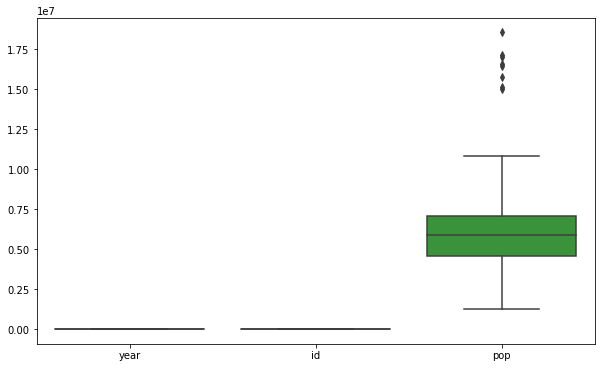

In [20]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(data=pop_2020_1)

In [27]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data,[2,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound)| (data < lower_bound))

In [49]:
delete_pop=outliers_iqr(pop_2020_1['pop'])[0]

In [106]:
type(delete_pop)

numpy.ndarray

In [51]:
pop_2020_1.iloc[[13,18,  77,  82, 141, 146, 205, 210],3]#,  ]

566     17021456
571     18543225
1576    14980285
1581    16446570
2586    15147726
2591    16568887
3596    15730058
3601    17164373
Name: pop, dtype: int64

In [90]:
a=pop[(pop['year']==2020) & (pop['id']==1)]

In [108]:
rmData = pd.DataFrame(columns=['index','pop'])
rmD = np.array()
for ye in set(pop['year']):
    for i in set(pop['id']):
#         pop[(pop['year']==2020) & (pop['gu']=='강남구')]
#         globals()['pop'+"_"+ye+"_"+i] =
#         rmData=rmData.append(pd.DataFrame([[i,pop[(pop['year']==ye) & (pop['id']==i)]['pop']]],
#                                          ),ignore_index=True)
        rmD = np.append(pop[(pop['year']==ye) & (pop['id']==i)]['pop'], axis=0)

TypeError: array() missing required argument 'object' (pos 1)

In [104]:
rmData

,0,1,index,pop
0,1.0,8151 1202416 8152 1386987 8153 283...,NaN,NaN
1,2.0,8081 2980011 8082 3262874 8083 17...,NaN,NaN
2,3.0,8711 2570076 8712 630354 8713 89...,NaN,NaN
3,4.0,8482 1553726 8483 1573703 8484 185...,NaN,NaN
4,5.0,8248 352236 8249 1166069 8250 117...,NaN,NaN
...,...,...,...,...
70,21.0,504 6283263 923 3364227 924 450591...,NaN,NaN
71,22.0,617 6151598 618 6015238 619 629816...,NaN,NaN
72,23.0,713 3114463 714 2662310 983 289497...,NaN,NaN
73,24.0,840 3276850 909 5400680 910 344689...,NaN,NaN


In [69]:
for i in set(pop['gu']):
    print(i)

서대문구
강동구
강북구
은평구
마포구
송파구
광진구
중랑구
노원구
서초구
양천구
도봉구
강남구
동대문구
구로구
성동구
중구
용산구
성북구
영등포구
종로구
금천구
강서구
관악구
동작구


In [65]:
# i=[]
for i in pop['id']:
#     print(i)
    globals()['pop' + str(i)] = i
#     print(pop1 + pop2)
# test2

NameError: name 'pop1' is not defined

In [ ]:
# import pymysql.cursors # Connect to the database

# connection = pymysql.connect(host='localhost',
#         user='root',
#         password='1234',
#         db='classicmodels',
#         charset='utf8',
#         cursorclass=pymysql.cursors.DictCursor)